<a href="https://colab.research.google.com/github/AYOUBSEDDOUKI/AYOUBSEDDOUKI/blob/main/Ridge%26Lassp_Pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn.datasets as dts

In [3]:
data = dts.load_diabetes()

In [4]:
import numpy as np
import pandas as pd
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
data.data
X = pd.DataFrame(data.data ,columns=data.feature_names)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [6]:
Y = pd.DataFrame(data.target,columns=["MEDV"])
Y=Y["MEDV"]
Y = (Y - np.mean(Y))/np.std(Y)
Y

0     -0.014719
1     -1.001659
2     -0.144580
3      0.699513
4     -0.222496
         ...   
437    0.335904
438   -0.625064
439   -0.261454
440    0.881318
441   -1.235408
Name: MEDV, Length: 442, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split as tts

In [8]:
#repartie la base de donnees
Xtrain,Xtest,Ytrain,Ytest=tts(X,Y,test_size=20,random_state=40)

In [9]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(422, 10)
(422,)
(20, 10)
(20,)


In [10]:
from sklearn.linear_model import LinearRegression as LR

In [11]:
regL = LR()
regL.fit(Xtrain,Ytrain)

LinearRegression()

In [12]:
#determini les coefficients
regL.coef_

array([  0.14852011,  -3.3305229 ,   6.6820164 ,   4.70734841,
       -11.58192945,   6.8065852 ,   1.52528418,   2.53021013,
        10.01798256,   0.5723796 ])

In [13]:
#import une fonction de l'erreur
from sklearn.metrics import mean_squared_error as mse

In [14]:
erreur_RL = mse(Ytest,regL.predict(Xtest))

In [15]:
erreur_RL

1.137586917153596

In [16]:
from sklearn.linear_model import Ridge ,Lasso

In [17]:
# l'intervalle de lamda
lmdas = np.logspace(-4,4,50)
erreursR = []
wsR=[]
reg=Ridge()
emin=1000
w_opt=[]
l_minR=0
for lm in lmdas:
  reg.set_params(alpha=lm)
  reg.fit(Xtrain,Ytrain)
  e = mse(Ytest,reg.predict(Xtest))
  erreursR.append(e)
  wsR.append(reg.coef_)
  if(e<emin):
    emin = e
    w_opt=reg.coef_
    l_minR=lm


In [18]:
# l'intervalle de lamda
lmdas = np.logspace(-4,4,50)
erreursL = []
wsL=[]
reg=Lasso()
eminL=1000
w_optL=[]
l_minL=0
for lm in lmdas:
  reg.set_params(alpha=lm)
  reg.fit(Xtrain,Ytrain)
  e = mse(Ytest,reg.predict(Xtest))
  erreursL.append(e)
  wsL.append(reg.coef_)
  if(e<emin):
    eminL = e
    w_optL=reg.coef_
    l_minL=lm

In [19]:
import matplotlib.pyplot as ppt
 

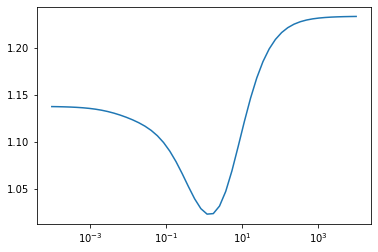

In [20]:
f = ppt.gca()
f.plot(lmdas,erreursR)
f.set_xscale('log')

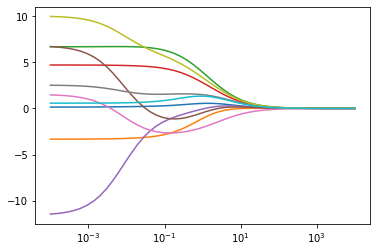

In [21]:
f = ppt.gca()
f.plot(lmdas,wsR)
f.set_xscale('log')

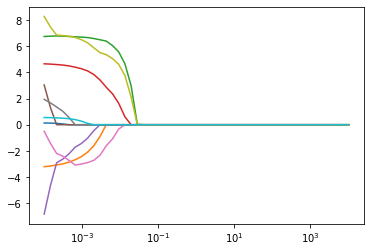

In [22]:
f = ppt.gca()
f.plot(lmdas,wsL)
f.set_xscale('log')

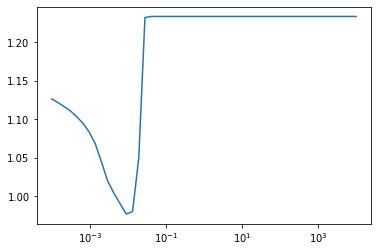

In [23]:
f = ppt.gca()
f.plot(lmdas,erreursL)
f.set_xscale('log')

In [24]:
print("l'erreur minimale pour la regularisation par Ridge : ",emin,"\n")
print("lamda optimale pour la regularisation par Ridge : ",l_minR,"\n")
print("************************************************************************ \n")
print("l'erreur minimale pour la regularisation par Lasso : ",eminL,"\n")
print("lamda optimale pour la regularisation par Lasso : ",l_minL,"\n")



l'erreur minimale pour la regularisation par Ridge :  1.0227513758426616 

lamda optimale pour la regularisation par Ridge :  1.2067926406393288 

************************************************************************ 

l'erreur minimale pour la regularisation par Lasso :  0.9799023806912366 

lamda optimale pour la regularisation par Lasso :  0.013257113655901081 



In [25]:
print("les valeurs des w optimaux pour Rigde: \n")
print(w_opt)
print("****************************************************************************\n")
print("les valeurs des w optimaux pour Lasso: \n")
print(w_optL)


les valeurs des w optimaux pour Rigde: 

[ 0.55438184 -0.91359829  3.63176338  2.60431652  0.01785963 -0.35372163
 -1.94603447  1.45746022  3.10831719  1.32070215]
****************************************************************************

les valeurs des w optimaux pour Lasso: 

[ 0.         -0.          4.65465912  0.60282364  0.          0.
 -0.          0.          3.75363972  0.        ]


In [26]:
regL.coef_

array([  0.14852011,  -3.3305229 ,   6.6820164 ,   4.70734841,
       -11.58192945,   6.8065852 ,   1.52528418,   2.53021013,
        10.01798256,   0.5723796 ])